In [3]:
import pickle, dgl
from settings import BASE_DIR

f = open("/Users/pratikaher/SPRING23/Capstone/GNN_Architecture/run_data/graph_files_subgraph/model_recommendations.pickle", 'rb')
model_recommendations = pickle.load(f)

f = open("/Users/pratikaher/SPRING23/Capstone/GNN_Architecture/run_data/graph_files_subgraph/recommendations_from_valid_graph.pickle", 'rb')
recommendations_from_valid_graph = pickle.load(f)

/Users/pratikaher/DGL/graph-rec/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [34]:
len(model_recommendations[0])

31474

In [35]:
def compare_rec(valid_recs, model_recs):

    total = 0
    correct = 0
    
    result = []
    number_products = len(model_recommendations[0])
    num_recs = 20

    for key, value in valid_recs.items():

        model_recs_list = model_recs[key][:num_recs]
        test_recs_list = valid_recs[key]
        
        TP = len([value for value in test_recs_list if value in set(model_recs_list)])
        FN = len([value for value in test_recs_list if value not in set(model_recs_list)])
        FP = num_recs - TP
        TN = number_products - (TP + FP + FN)
        
        result.append((TP, FP, FN, TN))
        
#             correct += len(recommended_movies_correct)
#             total += len(set(test_recs_list))
        
        

#         break

        # print(test_recs_list)

#         recommended_movies_correct = set(list(set(model_recs_list) & set(test_recs_list)))
        
#         result.append((len(recommended_movies_correct), len(set(model_recs_list)), len(set(test_recs_list))))

#         if len(set(test_recs_list)) > 0:

#             # print(
#             #     "User ID",
#             #     key,
#             #     "Correctly predicted movies",
#             #     recommended_movies_correct,
#             # )

#             # print(
#             #     "Total test values",
#             #     len(recommended_movies_correct),
#             #     "out of",
#             #     len(set(test_recs_list)),
#             # )

#             correct += len(recommended_movies_correct)
#             total += len(set(test_recs_list))
        
        # print("Ratings", [ ratings_HM[movie_id] for movie_id in recommended_movies_correct ])

    return correct, total, result


In [36]:
correct, total, result = compare_rec(recommendations_from_valid_graph, model_recommendations)

In [37]:
result[0]

(1, 19, 0, 31454)

In [25]:
print(correct, total)

0 0


In [33]:
for value in result:
    if value[0] > 1:
        print(value)

(2, 20, 2)


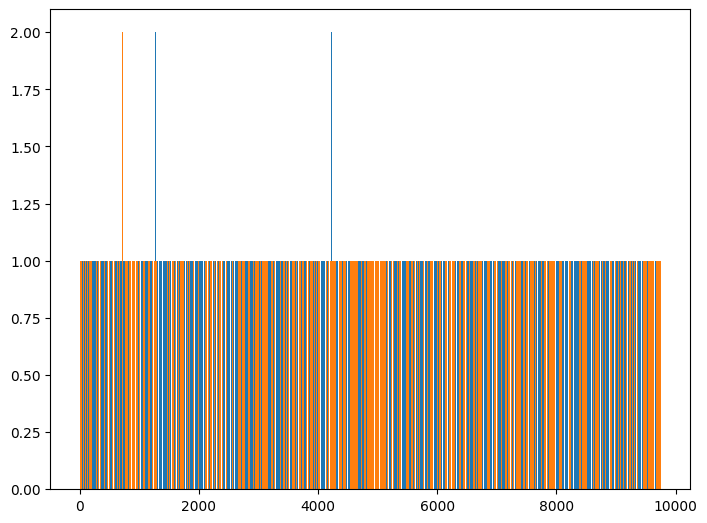

In [34]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = range(len(result))
TP_graph = [x[0] for x in result]
ax.bar(langs, [x[2] for x in result])
ax.bar(langs, rec_movies_correct, width = 2)
plt.show()